# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer
np.random.seed(203)

# Przydatne funkcje 

In [2]:
def draw_points(points,c = 'green'):
    vis = Visualizer()
    vis.add_point(points, s=30, color=c)
    vis.show()

In [3]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [4]:
def draw_line_without_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.axis_equal()
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [5]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

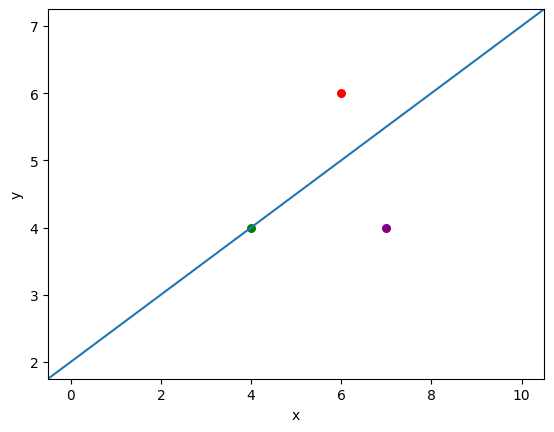

In [6]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [7]:
from random import randint
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    points = np.random.uniform(left,right,size = (n,2))
    return [tuple(point) for point in points]

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [8]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

Tabela poglądowa wygenerowanych punktów

In [9]:
df_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
df_a.head()

,X,Y
0,695.800121,-622.123141
1,-98.786234,250.694468
2,939.495293,-584.386636
3,188.897151,822.913759
4,-508.627701,548.607556


Wizualizacja na płaszczyźnie

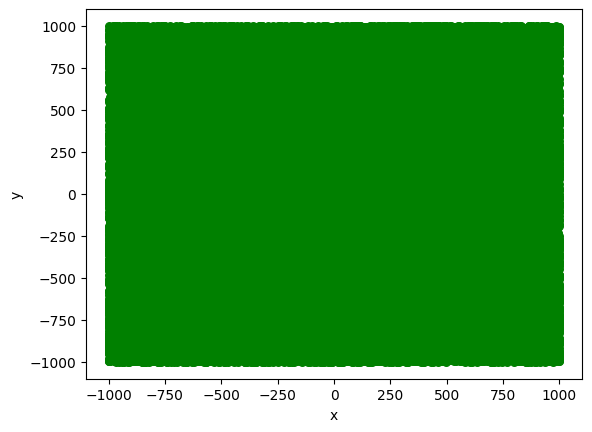

In [10]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [11]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

Tabela poglądowa wygenerowanych punktów

In [12]:
df_b = pd.DataFrame(data=points_b, columns=['X', 'Y'])
df_b.head()

,X,Y
0,-5.022984e+13,9.293570e+13
1,2.485823e+13,8.919923e+13
2,7.375850e+12,-4.279091e+12
3,2.765257e+13,-8.950557e+13
4,-5.458480e+13,-6.586121e+13


Wizualizacja na płaszczyźnie

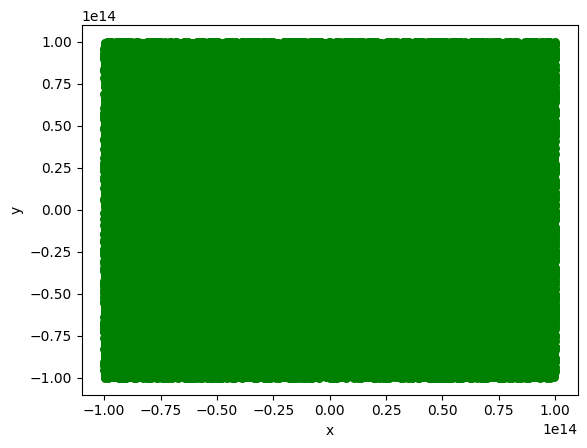

In [13]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [14]:
from math import sqrt
def generate_circle_points(O, R, n = 100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    x0,y0 = O
    points = []
    for i in range(n):
        t=np.random.uniform(0,4,1)[0]
        x = R*(np.cos(np.pi*t/2)+x0)
        y = R*(np.sin(np.pi*t/2)+y0)
        points.append((x, y))
    return points

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [15]:
points_c = generate_circle_points((0, 0), 100,10**3)

Zwizualizuj wygenerowane punkty.

Tabela poglądowa wygenerowanych punktów

In [16]:
df_c = pd.DataFrame(data=points_c, columns=['X', 'Y'])
df_c.head()

,X,Y
0,67.326239,-73.940365
1,90.058675,-43.467632
2,-99.325153,-11.598017
3,-99.001197,14.098330
4,92.296992,38.487210


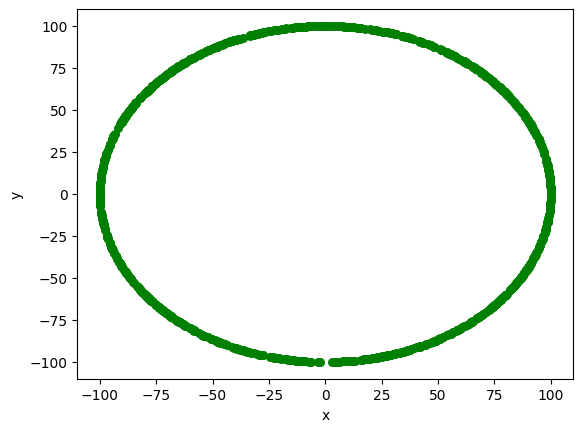

In [17]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [18]:
def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek wektora tworzącego prostą
    :param b: krotka współrzędnych oznaczająca koniec wektora tworzącego prostą
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    # raise Exception("Unimplemented")
    points = []
    xa,ya = a
    xb,yb = b
    linear_a = (yb-ya)/(xb-xa)
    linear_b = yb-linear_a*xb

    # raise Exception("Unimplemented")
    for _ in range(n):
        x = np.random.uniform(-1000, 1000)
        y = linear_a * x + linear_b
        points.append((x,y))
    return points
    
    

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [19]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1),10**3)

Zwizualizuj wygenerowane punkty.

Tabela poglądowa wygenerowanych punktów

In [20]:
df_d = pd.DataFrame(data=points_d, columns=['X', 'Y'])
df_d.head()

,X,Y
0,986.926991,49.396350
1,-179.648555,-8.932428
2,280.316053,14.065803
3,-865.498109,-43.224905
4,163.710837,8.235542


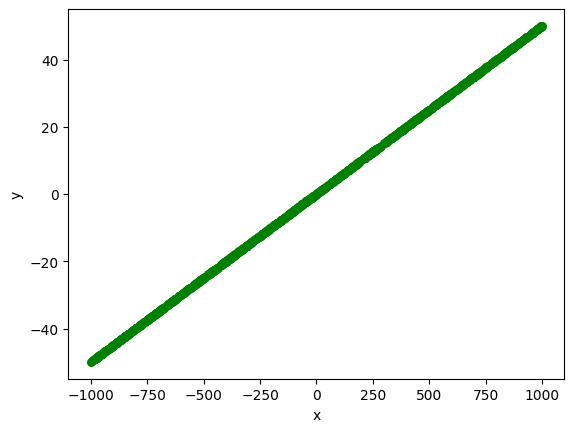

In [21]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [22]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.224s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [23]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    return (ax * by) + (ay * cx) + (bx * cy) - (by * cx) - (ay * bx) - (ax * cy)
    

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [24]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    matrix = np.array([[ax, ay, 1],
                      [bx, by, 1],
                      [cx, cy, 1]])
    return np.linalg.det(matrix)

Uzupełnij funkcje ```mat_det_2x2```

In [25]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    return (ax - cx)*(by-cy) - (ay-cy)*(bx-cx)

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [26]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    matrix = np.array([[ax - cx, ay-cy],
                      [bx-cx, by-cy]])
    return np.linalg.det(matrix)

Przetestujmy napisane powyżej funkcje.

In [27]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [28]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left=[]
    on_line=[]
    right=[]
    n=len(points)
    for i in range(n):
        det=mat_det_func(a,b,points[i])
        if det>eps: left.append(points[i])
        elif det<-eps: right.append(points[i])
        else: on_line.append(points[i])
    return left,on_line,right

In [29]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

# Funckcja pomocnicze

In [30]:
def categorize_points_by_eps_and_det(data):
    # classified_points_left[numer dokładności e][numer wyznacznika]
    E=[10**(-8),10**(-10),10**(-12),10**(-14),0]
    classified_points_left = [[[] for _ in range(4)] for _ in range(len(E))]
    classified_points_mid = [[[] for _ in range(4)] for _ in range(len(E))]
    classified_points_right = [[[] for _ in range(4)] for _ in range(len(E))]
    
    
    mat_det_func = [mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib]
    for i in range(4):
        for j in range(len(E)):
            classified_points_left[j][i],classified_points_mid[j][i],classified_points_right[j][i] = categorize_points(data, a, b, mat_det_func[i], E[j])
    return classified_points_left, classified_points_mid, classified_points_right
            


do zrobienia tabelki

In [31]:
def print_data(classified_points_left,classified_points_mid,classified_points_right):
    
    len_tab = [[[0 for _ in range(4)] for _ in range(3)] for _ in range(5)]
    # len_tab[numer dokładności e][po lewej, środek, po prawej][numer wyznacznika]
    for e in range(5):
        for i in range(4):
            len_tab[e][0][i] = len(classified_points_left[e][i])
        for i in range(4):
            len_tab[e][1][i] = len(classified_points_mid[e][i])
        for i in range(4):
            len_tab[e][2][i] = len(classified_points_right[e][i])
    for e in range(5):
        if e==4: print(f"ilość punktów po danych stronach dla dokładności 0")
        else: print(f"ilość punktów po danych stronach dla dokładności 10^({-2*e-8})")
        
        df_b = pd.DataFrame(data = len_tab[e], columns=['mat_det_3x3', 'mat_det_2x2', 'mat_det_3x3_lib', 'mat_det_2x2_lib'], index=['left', 'mid', 'right'])
        print(df_b)
        print()

# Wizualizacja zbioru A dla różnych dokładności i typem danych punktów

- float64

In [32]:
classified_points_a_left_f64,classified_points_a_mid_f64,classified_points_a_right_f64 = categorize_points_by_eps_and_det(points_a)

In [33]:
print_data(classified_points_a_left_f64,classified_points_a_mid_f64,classified_points_a_right_f64)

ilość punktów po danych stronach dla dokładności 10^(-8)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         50080        50080            50080            50080
mid              0            0                0                0
right        49920        49920            49920            49920

ilość punktów po danych stronach dla dokładności 10^(-10)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         50080        50080            50080            50080
mid              0            0                0                0
right        49920        49920            49920            49920

ilość punktów po danych stronach dla dokładności 10^(-12)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         50080        50080            50080            50080
mid              0            0                0                0
right        49920        49920            49920            49920

ilość punktów po danych stronach

Brak różnic pomiędzy wyliczonymi wyznacznikami

- float 32

In [34]:
points_a_float32 = np.float32(points_a)

In [35]:
classified_points_a_left_f32,classified_points_a_mid_f32,classified_points_a_right_f32 = categorize_points_by_eps_and_det(points_a_float32)

In [36]:
print_data(classified_points_a_left_f32,classified_points_a_mid_f32,classified_points_a_right_f32)

ilość punktów po danych stronach dla dokładności 10^(-8)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         50080        50080            50080            50080
mid              0            0                0                0
right        49920        49920            49920            49920

ilość punktów po danych stronach dla dokładności 10^(-10)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         50080        50080            50080            50080
mid              0            0                0                0
right        49920        49920            49920            49920

ilość punktów po danych stronach dla dokładności 10^(-12)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         50080        50080            50080            50080
mid              0            0                0                0
right        49920        49920            49920            49920

ilość punktów po danych stronach

Brak różnic pomiędzy wyliczonymi wyznacznikami

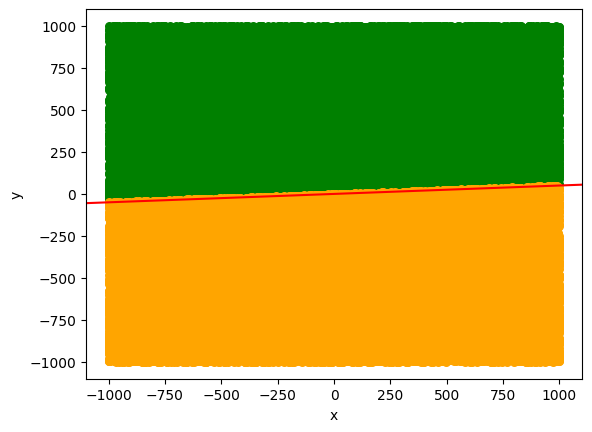

In [37]:
draw_line(classified_points_a_left_f64[0][0],classified_points_a_mid_f64[0][0],classified_points_a_right_f64[0][0])

# Wizualizacja zbioru B dla różnych dokładności i typem danych punktów

- float64

In [38]:
classified_points_b_left_f64,classified_points_b_mid_f64,classified_points_b_right_f64 = categorize_points_by_eps_and_det(points_b)

In [39]:
print_data(classified_points_b_left_f64,classified_points_b_mid_f64,classified_points_b_right_f64)

ilość punktów po danych stronach dla dokładności 10^(-8)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         49726        49721            49726            49720
mid              0            8                0                8
right        50274        50271            50274            50272

ilość punktów po danych stronach dla dokładności 10^(-10)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         49726        49721            49726            49720
mid              0            8                0                8
right        50274        50271            50274            50272

ilość punktów po danych stronach dla dokładności 10^(-12)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         49726        49721            49726            49720
mid              0            8                0                8
right        50274        50271            50274            50272

ilość punktów po danych stronach

największa róznica między mat_det_3x3, a mat_det2x2. zwizualizujmy te punkty

In [40]:
diff_punkts_left = list(set(classified_points_b_left_f64[0][1])-set(classified_points_b_left_f64[0][0]))
diff_punkts_mid = list(set(classified_points_b_mid_f64[0][1])-set(classified_points_b_mid_f64[0][0]))
diff_punkts_right = list(set(classified_points_b_right_f64[0][1])-set(classified_points_b_right_f64[0][0]))

1
8
1


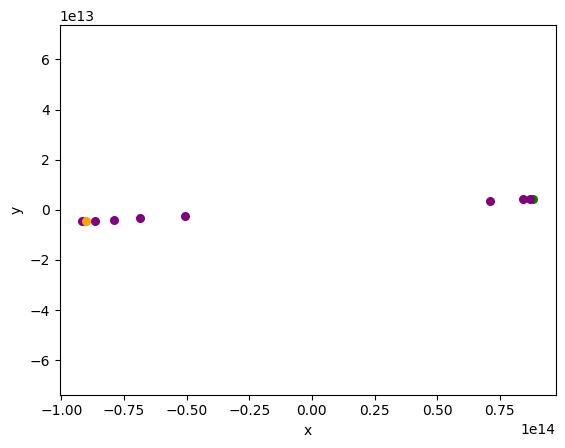

In [41]:
draw_line_without_line(diff_punkts_left,diff_punkts_mid,diff_punkts_right)
print(len(diff_punkts_left))
print(len(diff_punkts_mid))
print(len(diff_punkts_right))

Obraz

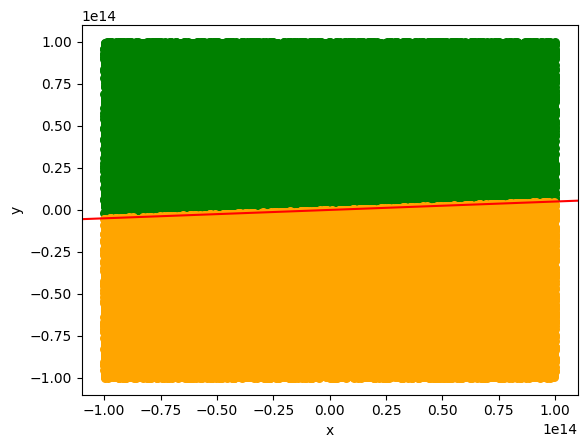

In [42]:
draw_line(classified_points_b_left_f64[1][0],classified_points_b_mid_f64[1][0],classified_points_b_right_f64[1][0])

- float32

In [43]:
points_b_float32 = np.float32(points_b)

In [44]:
classified_points_b_left_f32,classified_points_b_mid_f32,classified_points_b_right_f32 = categorize_points_by_eps_and_det(points_b_float32)

In [45]:
print_data(classified_points_b_left_f32,classified_points_b_mid_f32,classified_points_b_right_f32)

ilość punktów po danych stronach dla dokładności 10^(-8)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         49726            0            49726             6602
mid              0       100000                0            86769
right        50274            0            50274             6629

ilość punktów po danych stronach dla dokładności 10^(-10)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         49726            0            49726             6602
mid              0       100000                0            86769
right        50274            0            50274             6629

ilość punktów po danych stronach dla dokładności 10^(-12)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left         49726            0            49726             6602
mid              0       100000                0            86769
right        50274            0            50274             6629

ilość punktów po danych stronach

punkty dla det_2x2 zostały źle sklasyfikowane z braku wystarczającej dokładności dla float32

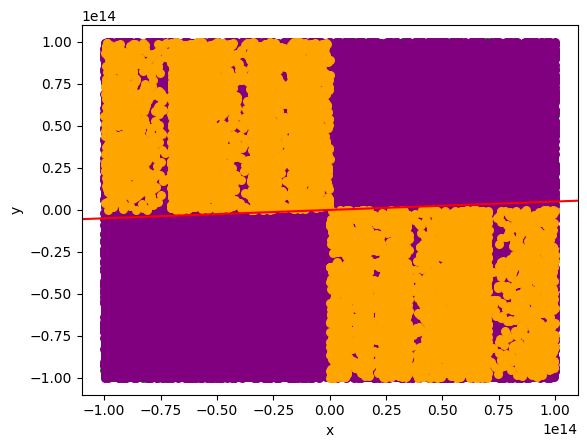

In [46]:
draw_line(classified_points_b_left_f32[0][3],classified_points_b_mid_f32[0][3],classified_points_b_right_f32[0][3])

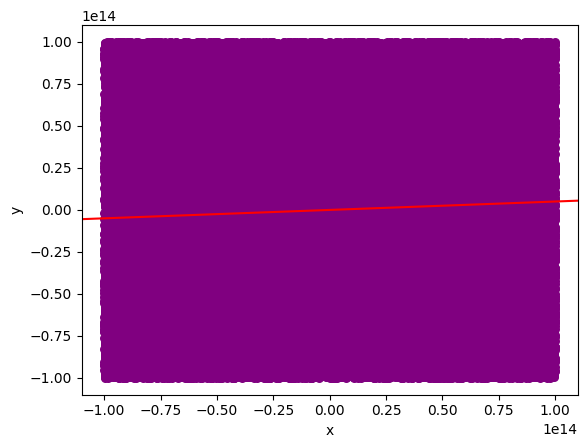

In [47]:
draw_line(classified_points_b_left_f32[0][1],classified_points_b_mid_f32[0][1],classified_points_b_right_f32[0][1])

# Wizualizacja zbioru C dla różnych dokładności i typem danych punktów

In [48]:
classified_points_c_left_f64,classified_points_c_mid_f64,classified_points_c_right_f64 = categorize_points_by_eps_and_det(points_c)

In [49]:
print_data(classified_points_c_left_f64,classified_points_c_mid_f64,classified_points_c_right_f64)

ilość punktów po danych stronach dla dokładności 10^(-8)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left           488          488              488              488
mid              0            0                0                0
right          512          512              512              512

ilość punktów po danych stronach dla dokładności 10^(-10)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left           488          488              488              488
mid              0            0                0                0
right          512          512              512              512

ilość punktów po danych stronach dla dokładności 10^(-12)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left           488          488              488              488
mid              0            0                0                0
right          512          512              512              512

ilość punktów po danych stronach

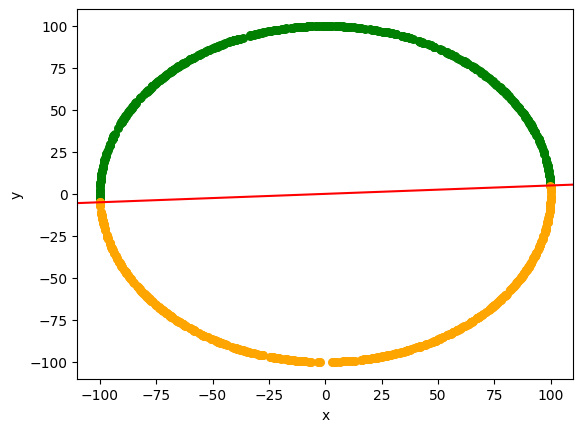

In [50]:
draw_line(classified_points_c_left_f64[0][0], classified_points_c_mid_f64[0][0], classified_points_c_right_f64[0][0])

brak różnic

- float32

In [51]:
points_c_float32 = np.float32(points_c)

In [52]:
classified_points_c_left_f32,classified_points_c_mid_f32,classified_points_c_right_f32 = categorize_points_by_eps_and_det(points_c_float32)

In [53]:
print_data(classified_points_c_left_f32,classified_points_c_mid_f32,classified_points_c_right_f32)

ilość punktów po danych stronach dla dokładności 10^(-8)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left           488          488              488              488
mid              0            0                0                0
right          512          512              512              512

ilość punktów po danych stronach dla dokładności 10^(-10)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left           488          488              488              488
mid              0            0                0                0
right          512          512              512              512

ilość punktów po danych stronach dla dokładności 10^(-12)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left           488          488              488              488
mid              0            0                0                0
right          512          512              512              512

ilość punktów po danych stronach

brak różnic

* # Wizualizacja zbioru D dla różnych dokładności i typem danych punktów

In [54]:
classified_points_d_left_f64,classified_points_d_mid_f64,classified_points_d_right_f64 = categorize_points_by_eps_and_det(points_d)

In [55]:
print_data(classified_points_d_left_f64,classified_points_d_mid_f64,classified_points_d_right_f64)

ilość punktów po danych stronach dla dokładności 10^(-8)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left             0            0                0                0
mid           1000         1000             1000             1000
right            0            0                0                0

ilość punktów po danych stronach dla dokładności 10^(-10)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left             0            0                0                0
mid           1000         1000             1000             1000
right            0            0                0                0

ilość punktów po danych stronach dla dokładności 10^(-12)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left             0           83                0              107
mid           1000          842             1000              783
right            0           75                0              110

ilość punktów po danych stronach

Wizualizacja dla e = 10^(-8)

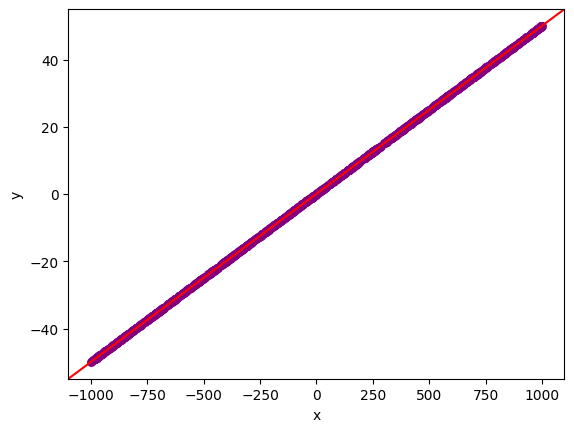

In [56]:
draw_line(classified_points_d_left_f64[0][0],classified_points_d_mid_f64[0][0],classified_points_d_right_f64[0][0])

Wizualizacja dla e = 10^(-12) i wyznaczniaka mat_det_2x2_lib

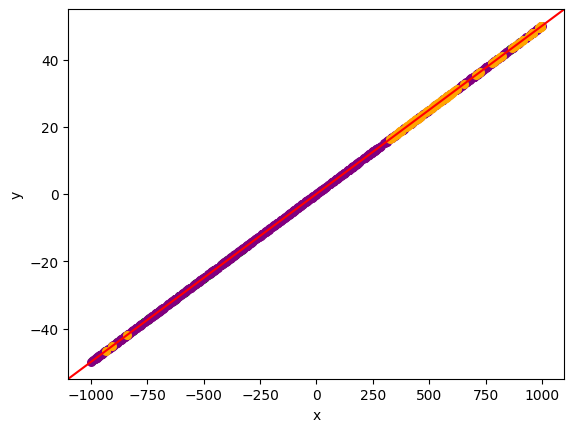

In [57]:
draw_line(classified_points_d_left_f64[2][3],classified_points_d_mid_f64[2][3],classified_points_d_right_f64[2][3])

Wizualizacja dla e = 10^(-15) i wyznaczniaka mat_det_2x2_lib

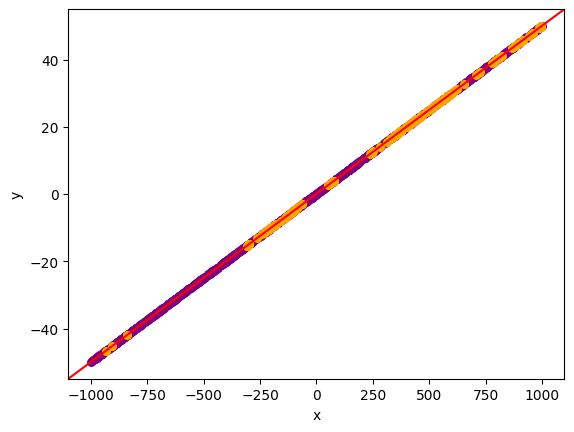

In [58]:
draw_line(classified_points_d_left_f64[3][3],classified_points_d_mid_f64[3][3],classified_points_d_right_f64[3][3])

Różnica pomiędzy wyznacznikami mat_det_3x3 i mat_det_2x2

In [59]:
diff_punkts_left = list(set(classified_points_d_left_f64[2][1])-set(classified_points_d_left_f64[2][0]))
diff_punkts_mid = list(set(classified_points_d_mid_f64[2][1])-set(classified_points_d_mid_f64[2][0]))
diff_punkts_right = list(set(classified_points_d_right_f64[2][1])-set(classified_points_d_right_f64[2][0]))

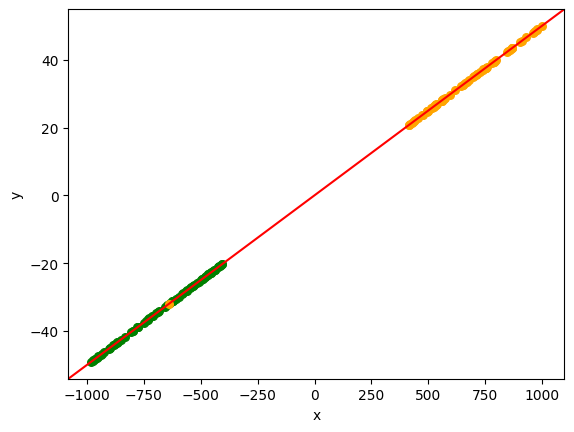

In [60]:
draw_line(diff_punkts_left,diff_punkts_mid,diff_punkts_right)

Różnica pomiędzy niedokładnościami e12 i e14

In [61]:
diff_punkts_left = list(set(classified_points_d_left_f64[3][1])-set(classified_points_d_left_f64[2][1]))
diff_punkts_mid = list(set(classified_points_d_mid_f64[3][1])-set(classified_points_d_mid_f64[2][1]))
diff_punkts_right = list(set(classified_points_d_right_f64[3][1])-set(classified_points_d_right_f64[2][1]))

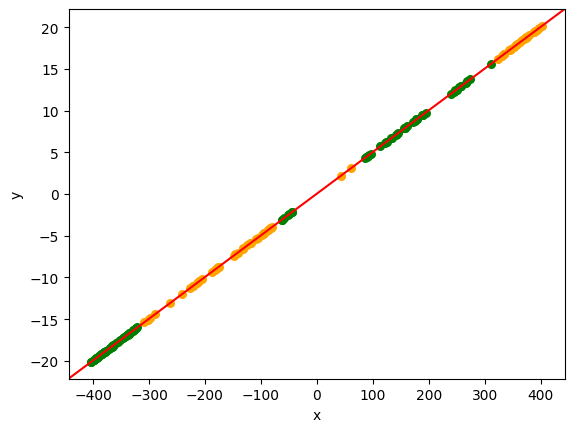

In [62]:
draw_line(diff_punkts_left,diff_punkts_mid,diff_punkts_right)

Różnica pomiędzy niedokładnościami e14 i 0

In [63]:
diff_punkts_left = list(set(classified_points_d_left_f64[4][0])-set(classified_points_d_left_f64[3][0]))
diff_punkts_mid = list(set(classified_points_d_mid_f64[4][0])-set(classified_points_d_mid_f64[3][0]))
diff_punkts_right = list(set(classified_points_d_right_f64[4][0])-set(classified_points_d_right_f64[3][0]))

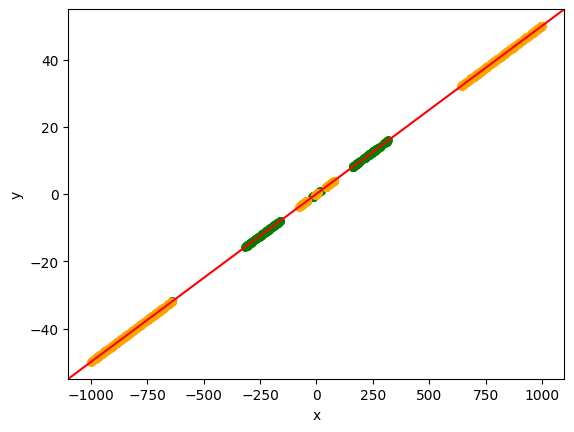

In [64]:
draw_line(diff_punkts_left,diff_punkts_mid,diff_punkts_right)

- float32

In [65]:
points_d_float32 = np.float32(points_d)

In [66]:
classified_points_d_left_f32,classified_points_d_mid_f32,classified_points_d_right_f32 = categorize_points_by_eps_and_det(points_d_float32)

In [67]:
print_data(classified_points_d_left_f32,classified_points_d_mid_f32,classified_points_d_right_f32)

ilość punktów po danych stronach dla dokładności 10^(-8)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left           316          164              405              519
mid            376          685              200                1
right          308          151              395              480

ilość punktów po danych stronach dla dokładności 10^(-10)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left           317          165              407              520
mid            375          684              197                0
right          308          151              396              480

ilość punktów po danych stronach dla dokładności 10^(-12)
       mat_det_3x3  mat_det_2x2  mat_det_3x3_lib  mat_det_2x2_lib
left           317          165              407              520
mid            375          684              197                0
right          308          151              396              480

ilość punktów po danych stronach

wykres dla wyznacznika mat_det_3x3

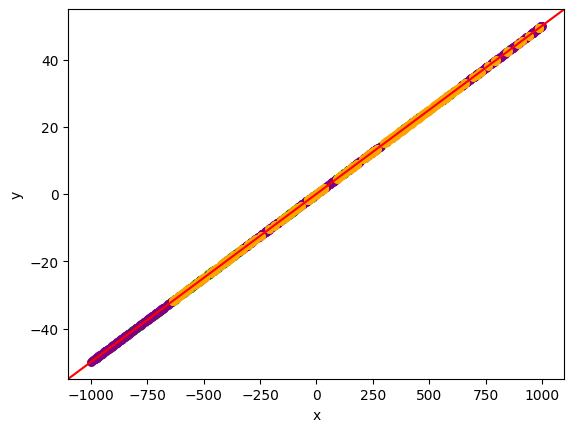

In [68]:
draw_line(classified_points_d_left_f32[3][0],classified_points_d_mid_f32[3][0],classified_points_d_right_f32[3][0])

wykres dla wyznacznika mat_det_2x2

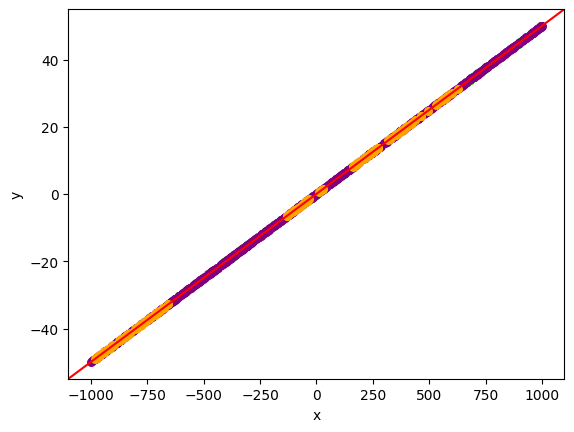

In [69]:
draw_line(classified_points_d_left_f32[3][1],classified_points_d_mid_f32[3][1],classified_points_d_right_f32[3][1])

wykres dla wyznacznika mat_det_2x2_lib

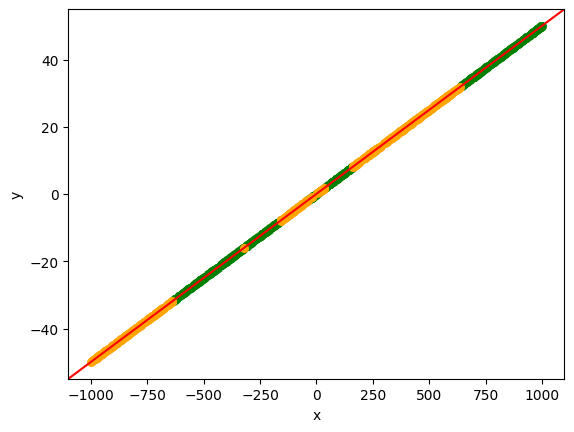

In [70]:
draw_line(classified_points_d_left_f32[3][3],classified_points_d_mid_f32[3][3],classified_points_d_right_f32[3][3])

wykres dla wyznacznika mat_det_3x3_lib

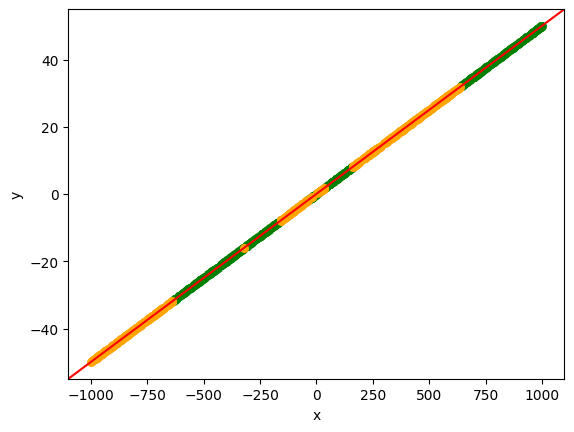

In [71]:
draw_line(classified_points_d_left_f32[3][3],classified_points_d_mid_f32[3][3],classified_points_d_right_f32[3][3])

Różnica miedzy dokładnościami

e=10^(-8) i e=0 dla det_mat_2x2_lib

In [72]:

diff_punkts_left = list(set(tuple(point) for point in classified_points_d_left_f32[4][2])-set(tuple(point) for point in classified_points_d_left_f32[0][2]))
diff_punkts_mid = list(set(tuple(point) for point in classified_points_d_mid_f32[4][2])-set(tuple(point) for point in classified_points_d_mid_f32[0][2]))
diff_punkts_right = list(set(tuple(point) for point in classified_points_d_right_f32[4][2])-set(tuple(point) for point in classified_points_d_right_f32[0][2]))

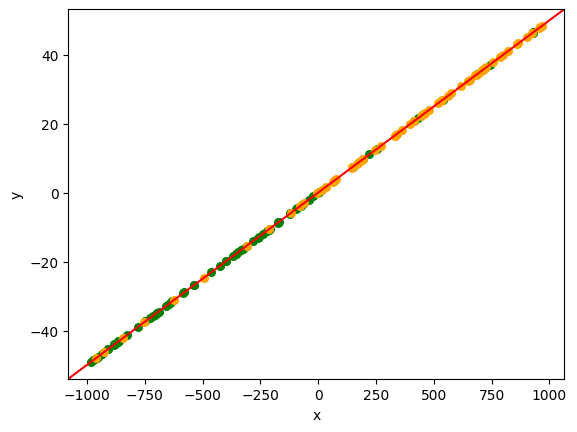

In [73]:
draw_line(diff_punkts_left,diff_punkts_mid,diff_punkts_right)

e-8 i e-14 dla det_mat_3x3

In [74]:

diff_punkts_left = list(set(tuple(point) for point in classified_points_d_left_f32[3][0])-set(tuple(point) for point in classified_points_d_left_f32[0][0]))
diff_punkts_mid = list(set(tuple(point) for point in classified_points_d_mid_f32[3][0])-set(tuple(point) for point in classified_points_d_mid_f32[0][0]))
diff_punkts_right = list(set(tuple(point) for point in classified_points_d_right_f32[3][0])-set(tuple(point) for point in classified_points_d_right_f32[0][0]))

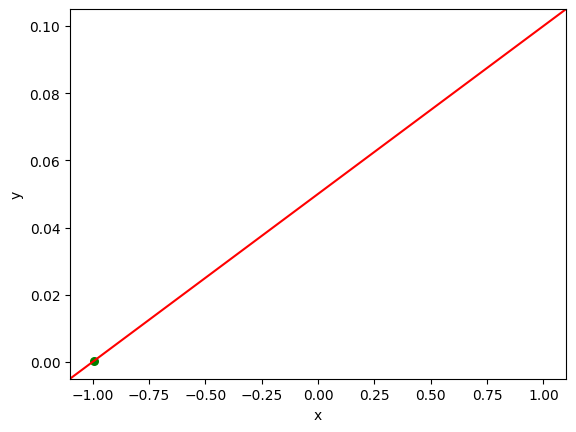

In [75]:
draw_line(diff_punkts_left,diff_punkts_mid,diff_punkts_right)

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


Wnioski przedstawione w sprawozdaniu